## Data Analysys Project: Analysis of Isekai Sub-Genre Growth (2000 - 2024)

### 11. Resuming
In the previous two notebooks we confirmed, observed, and quantified the growth and representation of the isekai sub-genre.

### 12. Introduction and objectives
In this notebook we are going to examine **one** of the possible reasons for that growth: **original source expansion**. It's possible that one of the reasons for the observed growth in the isekai sub-genre is a considerable increase in the original sources, primarily **manga** and **light novels**.

**Objectives:**
- Quantify the proportion of isekai anime derived from different source materials
- Analyze the trend in anime adaptations from manga and light novel sources
- Investigate whether there's a correlation between source material growth and isekai anime production

### 13. Dataset Description:
For this notebooks in adition to *Animes [1962-2024]*, we will use also two differents data frames, one for **mangas** and other for **light novels**.

**Light novel:** 

*Data Source:* novel-dataset by shaido987, granted explicit permission to use his dataset

*Source:* [GitHub](https://github.com/shaido987/novel-dataset)

**Manga:**

*Data Source:* MyanimeList Anime & Manga Dataset (July 2025) by Hamza Ashfaq, licensed under MIT

*Source:* [Kaggle](https://www.kaggle.com/datasets/hamzaashfaque1999/myanimelist-scraped-data)

*License:* [MIT](https://www.mit.edu/~amini/LICENSE.md)

### 14. Import and Enviroment Setup

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import sys

sys.path.append("../")
pd.set_option("display.max_rows", None)

from src import helpers

### 15. Data Loading

In [24]:
novel_path = "../data/novels_0.1.5.csv"
manga_path = "../data/manga_entries.csv"

_, ianime_df = helpers.cidf(["Title", "Release", "Theme", "Source"])
novel_df = pd.read_csv(novel_path, usecols=[1,2,5,8,9])
manga_df = pd.read_csv(manga_path, usecols=[2,19,23])

### 16. Data Cleaning and Filtering

#### Novels

Since we are focusing in the anime industry only novels from Japan, China and South Korea will be used, as well as only the ones relased between 2000 and 2024. In addition, should any tag be empty, then its row will be removed

In [25]:
countries = ["Japanese", "Chinese", "Korean"]

novel_df = novel_df[novel_df["original_language"].str.lower().isin([c.lower()for c in countries])]

novel_df = novel_df.dropna(subset=["start_year"])
novel_df["start_year"] = novel_df["start_year"].str.replace(r"[^\d]", "", regex=True)

novel_df["start_year"] = pd.to_numeric(novel_df["start_year"])
novel_df = novel_df[(novel_df["start_year"] > 1999) & (novel_df["start_year"] < 2025)]

novel_df["tags"] = novel_df["tags"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

novel_df = novel_df[novel_df["tags"].apply(lambda x: len(x) > 0)]

Only *Web Novels* and *Light Novels* will be take into account for this analysis, due to their **major relevance** in the anime industry. Duplicates will be removed as well to ensure that the same work is not counted twice.

In [26]:
types = ["Web novel", "Light novel"]

novel_df = novel_df[novel_df["novel_type"].str.lower().isin([c.lower() for c in types])]

duplicates = novel_df["name"].str.lower().duplicated().sum()
print(f"There are {duplicates} duplicates in the data frame")

novel_df = novel_df.drop_duplicates(subset="name")

There are 9 duplicates in the data frame


#### Mangas
All mangas without theme will be removed and as usual only mangas from 2000 to 2024 will be included. Also, the dulpicates rows will be removed.

In [27]:
manga_df["themes"] = manga_df["themes"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

manga_df = manga_df[manga_df["themes"].apply(lambda x: len(x) > 0)]

manga_df["publishing_date"] = (
    manga_df["publishing_date"]
    .str.extract(r'([A-Za-z]{3}\s+\d{1,2},\s+\d{4}|\d{4})', expand=False)
    .pipe(pd.to_datetime, errors="coerce")
)

manga_df = manga_df.dropna(subset="publishing_date")

manga_df = manga_df[(manga_df["publishing_date"].dt.year > 1999) & (manga_df["publishing_date"].dt.year < 2025)]

duplicates = manga_df["title_name"].str.lower().duplicated().sum()
print(f"There are {duplicates} mangas duplicated")

manga_df = manga_df.drop_duplicates(subset="title_name")

There are 744 mangas duplicated


### 17. Data Frames
This time, in addition to `ianime_df` (prior isekai_df), we will also use `inovel_df` (for isekai in novels), and `imanga_df` (for isekai in mangas).

**inovel_df**

In [28]:
tags_novel =["transported to another world", "reincarnated in another world", "reincarnated in a game world", "transported into a game world", "parallel worlds"]

inovel_df = novel_df[novel_df["tags"].apply(lambda x: any(tag.lower() in [t.lower() for t in tags_novel] for tag in x))]

**imanga_df**

In [29]:
imanga_df = manga_df[manga_df["themes"].apply(lambda x: "isekai" in [theme.lower() for theme in x])]

### 18. Analysis
First off, we'll explore the most common sources for isekai anime.

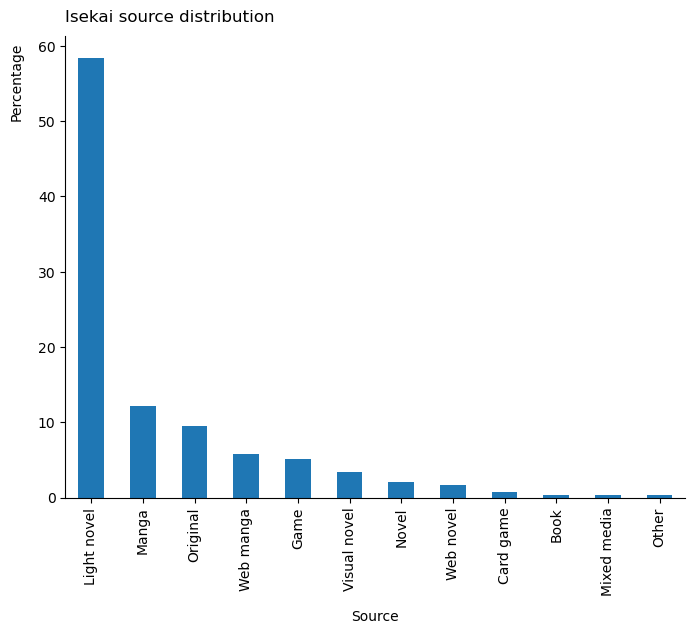

In [50]:
source_count = ianime_df.groupby("Source")["Source"].value_counts().sort_values(ascending=False) / len(ianime_df) * 100

plt.figure(figsize=(8,6))
source_count.plot(kind="bar")

plt.title("Isekai source distribution", loc="left", fontsize=12, pad=10)
plt.ylabel("Percentage", y=0.9, labelpad=10, fontsize=10)
plt.xlabel("Source", labelpad=10, fontsize=10)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()